<a href="https://colab.research.google.com/github/jshogland/SpatialModelingTutorials/blob/main/Notebooks/raster_tools_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use git to clone raster_tools to the local content directory

In [ ]:
!git clone https://github.com/jshogland/raster_tools.git

Cloning into 'raster_tools'...
remote: Enumerating objects: 1460, done.
remote: Counting objects: 100% (1460/1460), done.
remote: Compressing objects: 100% (994/994), done.
remote: Total 1460 (delta 930), reused 975 (delta 452), pack-reused 0
Receiving objects: 100% (1460/1460), 191.68 MiB | 24.33 MiB/s, done.
Resolving deltas: 100% (930/930), done.
Checking out files: 100% (128/128), done.


# Install dependencies and raster_tools

Don't forget to restart the runtime in order to use the installed versions.

In [ ]:
!pip install rioxarray
!pip install dask_geopandas
!pip install dask_image
!pip install -e ./raster_tools

     |████████████████████████████████| 47 kB 2.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 6.3 MB 44.4 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=2516c9080cb3de1a4e8192d1c83730c3e1ee15f9a06ee7111a6fe82e93bb5b02
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray
     |████████████████████████████████| 1.0 MB 5.5 MB/s 
     |████████████████████████████████| 2.1 MB 61.5 MB/s 
     |████████████████████████████████| 802 kB 49.6 MB/s 
     |████████████████████████████████| 1.0 MB 60.9 MB/s 
     |████████████████████████████████| 133 kB 60.1 MB/s 
     |████████████████████████████████| 15.4 MB 18.1 MB/s 
  Attempting uninstall: cloudpickle
    Found existing install

# Add raster_tools path to sys.path

In [ ]:
import sys
sys.path.append("./raster_tools")

# Import the tools and create a delayed reading raster surface (elevation). Look at how the data are chunked:

1.   small dataset (Stanislaus NF extent)
2.   one chunk

Note, the data could be chunked to take advantage of parallel processing (see notebook [rumple_index](https://colab.research.google.com/drive/1xfQM-aCjCR7JPj45ukXYv38xr4XJu5Wi?usp=sharing)).



In [ ]:
from raster_tools import Raster, surface
elev_path = "./raster_tools/test/data/elevation.tif"
elv=Raster(elev_path)
elv._rs

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<xarray.DataArray (band: 1, y: 3808, x: 2944)>
dask.array<copy, shape=(1, 3808, 2944), dtype=float32, chunksize=(1, 3808, 2944), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 -4.604e+04 -4.601e+04 ... 6.814e+04 6.817e+04
  * band         (band) int64 1
  * x            (x) float64 -4.785e+04 -4.782e+04 ... 4.041e+04 4.044e+04
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028230607370965e+38
    scale_factor:  1.0
    add_offset:    0.0

# Convert the elevation raster surface to aspect, slope, curvature, northing, easting, hillshade, and 3d surface area raster datasets.
We could do far more including arithmetic, conditional, logical, focal, convolution, local, aggregation, distance etc. but will use common surface module funtions for this example.

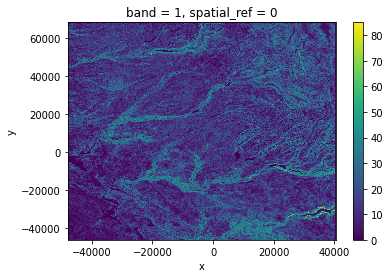

In [ ]:
asp=surface.aspect(elv)
sl=surface.slope(elv)
cur=surface.curvature(elv)
northing=surface.northing(elv)
easting=surface.easting(elv)
hillshade=surface.hillshade(elv)
s3d=surface.surface_area_3d(elv)

#use logical and arithmetic operations to change all cell values less than 0 to zero and plot results for slope raster (this could also be done with the remap function)
#note, nothing has been processed until ploting the results
((sl > 0) * sl)._rs.plot()


# Calculate the mean value of all cells greater than a value (cvl=0)
As one final example we will calculate means for surface raster cell values greater than a specified value (cvl=0) and cell counts for values less than that value.

In [ ]:
rslst=[asp,sl,cur,northing, easting, hillshade,s3d]
cvl=0 #compare value
for r in rslst:
  rxr=r.to_xarray()
  mv=rxr.where(rxr>=cvl).mean().values #conditional statement and mean calculation
  cnt=(rxr<cvl).sum().values #counts for the alternative
  print("Mean = " + str(mv) + ": < compare value count = " + str(cnt))


Mean = 191.09434423718204: < compare value count = 147714
Mean = 15.829436699392385: < compare value count = 13500
Mean = 0.7647183382281396: < compare value count = 5212429
Mean = 0.6430981669082128: < compare value count = 6010479
Mean = 0.6039692172177616: < compare value count = 6208412
Mean = 171.64166792736117: < compare value count = 0
Mean = 965.9186958966582: < compare value count = 13500


# Plot Aspect for values setting values less than zero equal to 0

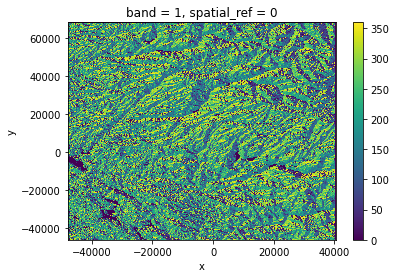

In [ ]:
((asp>=0)*asp)._rs.plot()